# 导入包

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

# 数据读取

In [9]:
varb = pd.read_csv("pn_bact/patients_sofa.csv", index_col=0)
varb = varb.loc[varb["hr"]==0]
varv = pd.read_csv("pn_virus/patients_sofa.csv", index_col=0)
varv = varv.loc[varv["hr"]==0]

# 组成分析

In [137]:
# varv["pn"] = 1
# varb["pn"] = 0
# df = pd.concat([varv,varb],0)
vardf = varb
df = varb
df = df[['respiration_24hours', 
      'coagulation_24hours', 
      'liver_24hours',
      'cardiovascular_24hours', 
      'cns_24hours',
      'renal_24hours',"30day_death"]] 
df.columns = ['respiration', 
      'coagulation', 
      'liver',
      'cardiovascular', 
      'cns',
      'renal',"30day_death"]

/home/data/t070224/miniconda3/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


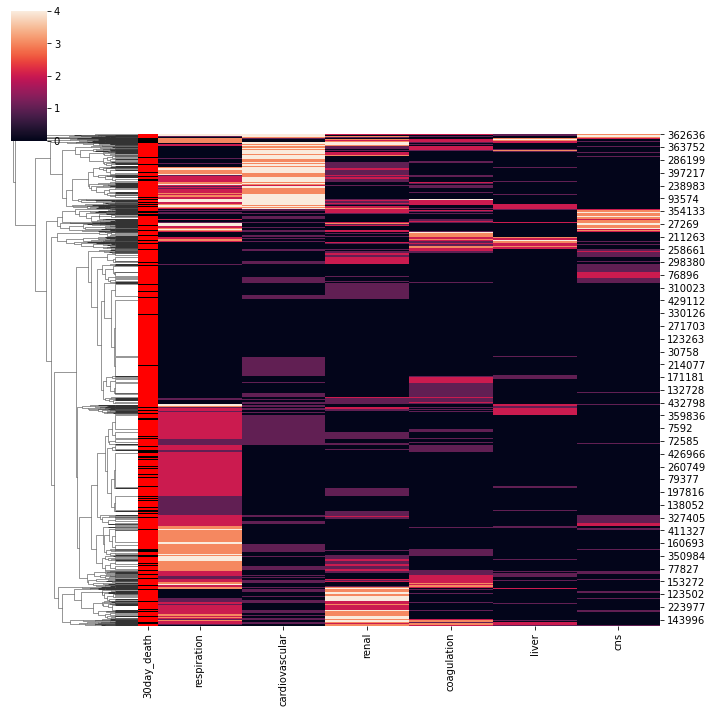

In [138]:
# 使用死亡率作为纵轴
lut = dict(zip(df["30day_death"].unique(), "rk"))
row_colors = df["30day_death"].map(lut)

g1 = sns.clustermap(
      df[['respiration', 'cardiovascular', 'renal', 'coagulation', 'liver','cns']], 
      row_colors=row_colors,
      col_cluster=False)

In [139]:
df1 = df.iloc[g1.dendrogram_row.reordered_ind][['respiration', 'cardiovascular', 'renal', 'coagulation', 'liver','cns']]

In [ ]:
# virus
df10 = df1.iloc[list(df1.index).index(43325):list(df1.index).index(31924)]
df11 = df1.iloc[list(df1.index).index(31924):list(df1.index).index(58583)]
df12 = df1.iloc[list(df1.index).index(58583):list(df1.index).index(52562)]
df13 = df1.iloc[list(df1.index).index(52562):list(df1.index).index(24781)]
df14 = df1.iloc[list(df1.index).index(24781):list(df1.index).index(58520)]
df15 = df1.iloc[list(df1.index).index(58520):list(df1.index).index(19909)]

In [141]:
# bacteria
df10 = df1.iloc[list(df1.index).index(362636):list(df1.index).index(422648)]
df11 = df1.iloc[list(df1.index).index(422648):list(df1.index).index(84892)]
df12 = df1.iloc[list(df1.index).index(84892):list(df1.index).index(336927)]
df13 = df1.iloc[list(df1.index).index(336927):list(df1.index).index(17976)]
df14 = df1.iloc[list(df1.index).index(17976):list(df1.index).index(27728)]
df15 = df1.iloc[list(df1.index).index(27728):list(df1.index).index(412220)]

In [140]:
df1.to_csv("pn_bact/sofa_bpn_cluster.csv")

In [144]:
dn = []
mn = []

for n, i in enumerate([df10, df11, df12, df13, df14, df15]):
    i["30day_death"] = vardf.loc[i.index, "30day_death"]
    i["death_day"] = vardf.loc[i.index, "death_day"]

    i["sofa_24hours"] = vardf.loc[i.index, "sofa_24hours"]

    dn.append("%s/%s" %(np.sum(i["30day_death"]),i["30day_death"].shape[0]))
    mn.append(np.mean(i))
    
    locals()["kmf" + str(n)] = KaplanMeierFitter() 
    locals()["kmf" + str(n)].fit(i["death_day"], i["30day_death"], label = "subgroup %s(N=%s)" % (n, i.shape[0]))

/tmp/ipykernel_2673459/2280772401.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i["30day_death"] = vardf.loc[i.index, "30day_death"]
/tmp/ipykernel_2673459/2280772401.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i["death_day"] = vardf.loc[i.index, "death_day"]
/tmp/ipykernel_2673459/2280772401.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pan

In [145]:
pd.DataFrame(dn)

,0
0,28/134
1,50/175
2,39/161
3,45/651
4,125/756
5,28/161


In [150]:
round(pd.DataFrame(mn),1)

,respiration,cardiovascular,renal,coagulation,liver,cns,30day_death,death_day,sofa_24hours
0,0.9,3.2,1.5,0.7,0.7,0.5,0.2,26.5,7.4
1,2.6,3.6,0.8,0.5,0.3,0.0,0.3,24.9,8.0
2,1.1,0.4,0.7,1.2,0.8,1.8,0.2,25.9,6.0
3,0.0,0.3,0.3,0.3,0.1,0.2,0.1,29.4,1.2
4,2.2,0.3,0.3,0.3,0.2,0.1,0.2,27.7,3.4
5,1.4,0.4,3.1,0.6,0.2,0.1,0.2,27.3,5.8


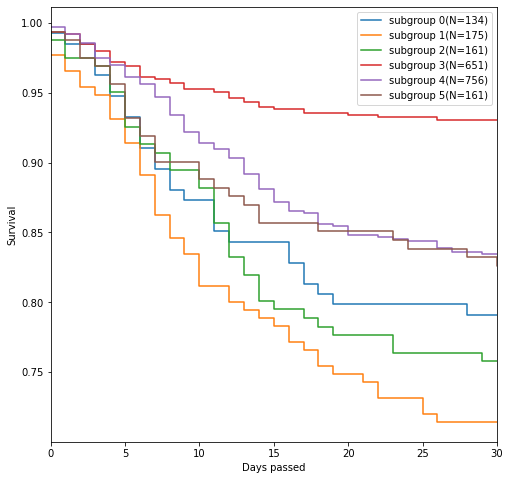

6.860194388140741e-11


In [148]:
# Import required libraries :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import pairwise_logrank_test
from scipy import stats
from copy import deepcopy
from lifelines import KaplanMeierFitter


fig, axes = plt.subplots(figsize=(8,8))
kmf0.plot(ax = axes, show_censors = True,ci_show=False)
kmf1.plot(ax = axes, show_censors = True,ci_show=False)
kmf2.plot(ax = axes, show_censors = True,ci_show=False)
kmf3.plot(ax = axes, show_censors = True,ci_show=False)
kmf4.plot(ax = axes, show_censors = True,ci_show=False)
kmf5.plot(ax = axes, show_censors = True,ci_show=False)

plt.xlabel("Days passed")
plt.ylabel("Survival")
# plt.title("Sruvival Curve")
plt.xlim([0,30])
# plt.ylim([0.6,1])
plt.show()

from lifelines.statistics import logrank_test
lr = logrank_test(df13["death_day"], 
                  df12["death_day"],
                  df13["30day_death"], 
                  df12["30day_death"])
print(lr.p_value)

In [134]:
from scipy import stats
stats.chi2_contingency([[11,23],[5,52]],correction=False)

(8.17219599243206,
 0.004253737577124908,
 1,
 array([[ 5.97802198, 28.02197802],
        [10.02197802, 46.97802198]]))

In [158]:
dic = []
dicp = []
for i in [df10, df11, df12, df13, df14, df15]:
    dici = []
    dicpi = []
    for j in [df10, df11, df12, df13, df14, df15]:
        a = stats.chi2_contingency([[np.sum(i["30day_death"]),i["30day_death"].shape[0]],[np.sum(j["30day_death"]),j["30day_death"].shape[0]]])
        dici.append(a[1])
        dicpi.append(logrank_test(i["death_day"], 
                  j["death_day"],
                  i["30day_death"], 
                  j["30day_death"]).p_value)
    dic.append(dici)
    dicp.append(dicpi)

In [159]:
round(pd.DataFrame(dic),2)

,0,1,2,3,4,5
0,1.00,0.29,0.69,0.0,0.37,0.63
1,0.29,1.00,0.57,0.0,0.00,0.07
2,0.69,0.57,1.00,0.0,0.07,0.28
3,0.00,0.00,0.00,1.0,0.00,0.00
4,0.37,0.00,0.07,0.0,1.00,0.91
5,0.63,0.07,0.28,0.0,0.91,1.00


In [160]:
round(pd.DataFrame(dicp),2)

,0,1,2,3,4,5
0,1.00,0.13,0.53,0.0,0.18,0.45
1,0.13,1.00,0.35,0.0,0.00,0.02
2,0.53,0.35,1.00,0.0,0.02,0.14
3,0.00,0.00,0.00,1.0,0.00,0.00
4,0.18,0.00,0.02,0.0,1.00,0.73
5,0.45,0.02,0.14,0.0,0.73,1.00


# 相关性分析

In [5]:
df = varb
cont_var = ['respiration_24hours', 
      'coagulation_24hours', 
      'liver_24hours',
      'cardiovascular_24hours', 
      'cns_24hours',
      'renal_24hours']

dic = {}
for i in cont_var:
    
    dici = {}
    for j in cont_var:
        
        (r,p) = stats.spearmanr(df[i], df[j])
        dici[j] = "%.2f" % r
    dic[i] = dici

In [6]:
pd.DataFrame(dic)

,respiration_24hours,coagulation_24hours,liver_24hours,cardiovascular_24hours,cns_24hours,renal_24hours
respiration_24hours,1.00,0.01,0.11,0.14,-0.07,0.13
coagulation_24hours,0.01,1.00,0.32,0.07,0.01,0.08
liver_24hours,0.11,0.32,1.00,0.06,0.00,0.08
cardiovascular_24hours,0.14,0.07,0.06,1.00,-0.02,0.17
cns_24hours,-0.07,0.01,0.00,-0.02,1.00,0.07
renal_24hours,0.13,0.08,0.08,0.17,0.07,1.00


# 比较各系统的SOFA

In [185]:
vardf = varb
dic0 = {}
for i in ['respiration_24hours', 
      'coagulation_24hours', 
      'liver_24hours',
      'cardiovascular_24hours', 
      'cns_24hours',
      'renal_24hours']:
    # sofa_re = vardf.loc[((vardf[i]/vardf['sofa_24hours'])>=0.50) & (vardf["sofa_24hours"]==2)]
    # sofa_total = vardf.loc[((vardf[i]/vardf['sofa_24hours'])<0.50) & (vardf["sofa_24hours"]==2)]
    sofa_re = vardf.loc[(vardf[i]>=2) & (vardf[i]==vardf["sofa_24hours"])]
    sofa_total = vardf.loc[(vardf["sofa_24hours"]>=2) & (vardf[i]!=vardf["sofa_24hours"])]
    
    a = np.sum(sofa_re["30day_death"])
    b = sofa_re.shape[0] - np.sum(sofa_re["30day_death"])
    c = np.sum(sofa_total["30day_death"])
    d = sofa_total.shape[0] - np.sum(sofa_total["30day_death"])

    tab = [[a,b],[c,d]]
    if (a+b+c+d > 40)  & (min([a,b,c,d]) > 5):
      p = "%.2f" % (stats.chi2_contingency(tab,correction=False)[1])
    if (a+b+c+d > 40)  & (min([a,b,c,d]) < 5) & (min([a,b,c,d]) > 1): 
      p = "%.2f" % (stats.chi2_contingency(tab,correction=True)[1])
    if (a+b+c+d < 40)  or (min([a,b,c,d]) < 1):
      p = "%.2f" % (stats.fisher_exact(tab)[1])
    dic0[i] = [
      round(np.mean(sofa_re[i]),2),
      "%s/%s(%.2f)" % (a, a+b, a/(a+b)*100),
      "%s/%s(%.2f)" % (c, c+d, c/(c+d)*100),
      p]
pd.DataFrame(dic0).T

,0,1,2,3
respiration_24hours,2.35,25/200(12.50),252/1347(18.71),0.03
coagulation_24hours,2.6,1/20(5.00),276/1527(18.07),0.03
liver_24hours,2.33,0/3(0.00),277/1544(17.94),1.00
cardiovascular_24hours,3.5,1/14(7.14),276/1533(18.00),1.00
cns_24hours,2.26,4/23(17.39),273/1524(17.91),1.00
renal_24hours,2.71,1/34(2.94),276/1513(18.24),1.00


In [10]:
dic = {}

j=2
for i in ['respiration_24hours', 
      'coagulation_24hours', 
      'liver_24hours',
      'cardiovascular_24hours', 
      'cns_24hours', 
      'renal_24hours',
      'sofa_24hours']:

      var_vpn = varv.loc[varv["hr"]==0]
      var_vpn = var_vpn.loc[var_vpn[i].dropna().index]
      var_vpn = var_vpn.loc[var_vpn["sofa_24hours"]==j]
      
      var_bpn = varb.loc[varb["hr"]==0]
      var_bpn = var_bpn.loc[var_bpn[i].dropna().index]
      var_bpn = var_bpn.loc[var_bpn["sofa_24hours"]==j]

      print(var_vpn.shape, var_bpn.shape)
      var_vpn[i] = var_vpn[i]/var_vpn["sofa_24hours"]
      var_bpn[i] = var_bpn[i]/var_bpn["sofa_24hours"]
      var_pn = pd.concat((var_vpn, var_bpn),0)

      dic[i] = ["%.2f(%.2f,%.2f)" % (
                  np.mean(var_pn[i]), 
                  np.percentile(var_pn[i], (25), interpolation='midpoint'),
                  np.percentile(var_pn[i], (75), interpolation='midpoint')),
            "%.2f(%.2f,%.2f)" % (
                  np.mean(var_vpn[i]), 
                  np.percentile(var_vpn[i], (25), interpolation='midpoint'),
                  np.percentile(var_vpn[i], (75), interpolation='midpoint')),
            "%.2f(%.2f,%.2f)" % (
                  np.mean(var_bpn[i]), 
                  np.percentile(var_bpn[i], (25), interpolation='midpoint'),
                  np.percentile(var_bpn[i], (75), interpolation='midpoint')),
            "%.2f" % (stats.mannwhitneyu(var_vpn[i].T,var_bpn[i].T,alternative='two-sided').pvalue)]
      print(dic[i])
pd.DataFrame(dic).T

(71, 35) (304, 35)
['0.49(0.00,1.00)', '0.32(0.00,1.00)', '0.53(0.00,1.00)', '0.00']
(71, 35) (304, 35)
['0.13(0.00,0.00)', '0.19(0.00,0.50)', '0.11(0.00,0.00)', '0.00']
(71, 35) (304, 35)
['0.03(0.00,0.00)', '0.04(0.00,0.00)', '0.03(0.00,0.00)', '0.69']
(71, 35) (304, 35)
['0.10(0.00,0.00)', '0.10(0.00,0.00)', '0.10(0.00,0.00)', '0.90']
(71, 35) (304, 35)
['0.10(0.00,0.00)', '0.11(0.00,0.00)', '0.09(0.00,0.00)', '0.44']
(71, 35) (304, 35)
['0.16(0.00,0.25)', '0.24(0.00,0.50)', '0.14(0.00,0.00)', '0.01']
(71, 35) (304, 35)
['1.00(1.00,1.00)', '1.00(1.00,1.00)', '1.00(1.00,1.00)', '1.00']


/tmp/ipykernel_1246135/2908013497.py:23: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  var_pn = pd.concat((var_vpn, var_bpn),0)
/tmp/ipykernel_1246135/2908013497.py:23: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  var_pn = pd.concat((var_vpn, var_bpn),0)
/tmp/ipykernel_1246135/2908013497.py:23: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  var_pn = pd.concat((var_vpn, var_bpn),0)
/tmp/ipykernel_1246135/2908013497.py:23: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  var_pn = pd.concat((var_vpn, var_bpn),0)
/tmp/ipykernel_1246135/2908013497.py:23: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  var_pn = pd

,0,1,2,3
respiration_24hours,"0.49(0.00,1.00)","0.32(0.00,1.00)","0.53(0.00,1.00)",0.00
coagulation_24hours,"0.13(0.00,0.00)","0.19(0.00,0.50)","0.11(0.00,0.00)",0.00
liver_24hours,"0.03(0.00,0.00)","0.04(0.00,0.00)","0.03(0.00,0.00)",0.69
cardiovascular_24hours,"0.10(0.00,0.00)","0.10(0.00,0.00)","0.10(0.00,0.00)",0.90
cns_24hours,"0.10(0.00,0.00)","0.11(0.00,0.00)","0.09(0.00,0.00)",0.44
renal_24hours,"0.16(0.00,0.25)","0.24(0.00,0.50)","0.14(0.00,0.00)",0.01
sofa_24hours,"1.00(1.00,1.00)","1.00(1.00,1.00)","1.00(1.00,1.00)",1.00
